In [2]:
import os
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '.'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'cocoapi/annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'cocoapi/annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=13.26s)
creating index...
index created!
loading annotations into memory...
Done (t=0.96s)
creating index...
index created!


http://images.cocodataset.org/val2014/COCO_val2014_000000275781.jpg


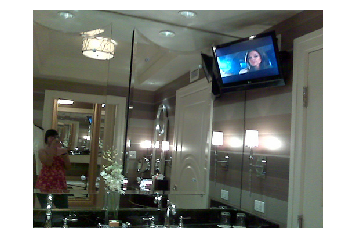

A woman in red shirt standing in bathroom with sinks and a television.
Black television sitting on the corner of a bathroom wall. 
A woman photographing a television located in a swank bathroom.
A woman stnind in a bathroom with a tv in the top corner.
A bathroom with a television mounted in the corner.


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [4]:
# Watch for any changes in vocabulary.py, data_loader.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

In [5]:
import torch
from data_loader import get_loader
from torchvision import transforms

# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

loading annotations into memory...
Done (t=2.03s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=1.73s)
creating index...


  0%|          | 252/414113 [00:00<02:44, 2517.88it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [02:12<00:00, 3134.32it/s]


In [6]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'

In [7]:
import nltk

sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']


In [8]:
sample_caption = []

start_word = data_loader.dataset.vocab.start_word
print('Special start word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

Special start word: <start>
[0]


In [9]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 754, 3, 396, 39, 3, 1009, 207, 139, 3, 753, 18]


In [10]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 98, 754, 3, 396, 39, 3, 1009, 207, 139, 3, 753, 18, 1]


In [11]:
sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  754,    3,  396,   39,    3, 1009,  207,  139,    3,
         753,   18,    1])


In [12]:
# Preview the word2idx dictionary.
print (dict(list(data_loader.dataset.vocab.word2idx.items())[:10]))

# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

{'<start>': 0, '<end>': 1, '<unk>': 2, 'a': 3, 'very': 4, 'clean': 5, 'and': 6, 'well': 7, 'decorated': 8, 'empty': 9}
Total number of tokens in vocabulary: 8856


In [13]:
# Minimum word count threshold.
vocab_threshold = 5

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

loading annotations into memory...
Done (t=2.25s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=1.94s)
creating index...


  0%|          | 186/414113 [00:00<03:42, 1859.87it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [02:28<00:00, 2787.21it/s]


Total number of tokens in vocabulary: 8856


In [14]:
# Minimum word count threshold.
vocab_threshold = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

loading annotations into memory...
Done (t=3.19s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=2.06s)
creating index...


  0%|          | 184/414113 [00:00<03:45, 1839.35it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [02:35<00:00, 2660.14it/s]


Total number of tokens in vocabulary: 6335


In [15]:
unk_word = data_loader.dataset.vocab.unk_word
print('Special unknown word:', unk_word)

print('All unknown words are mapped to this integer:', data_loader.dataset.vocab(unk_word))
print ("For example:")
print("'jfkafejw' is mapped to", data_loader.dataset.vocab('jfkafejw'))

Special unknown word: <unk>
All unknown words are mapped to this integer: 2
For example:
'jfkafejw' is mapped to 2


In [16]:
# Obtain the data loader (from file). Note that it runs much faster than before!
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_from_file=True)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=2.32s)
creating index...


  0%|          | 308/414113 [00:00<02:14, 3076.13it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:46<00:00, 3896.41it/s]


In [17]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86332
value: 11 --- count: 79945
value:  9 --- count: 71935
value: 12 --- count: 57639
value: 13 --- count: 37648
value: 14 --- count: 22335
value:  8 --- count: 20769
value: 15 --- count: 12842
value: 16 --- count:  7729
value: 17 --- count:  4842
value: 18 --- count:  3103
value: 19 --- count:  2015
value:  7 --- count:  1597
value: 20 --- count:  1451
value: 21 --- count:   999
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   383
value: 25 --- count:   277
value: 26 --- count:   215
value: 27 --- count:   159
value: 28 --- count:   115
value: 29 --- count:    86
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    39
value: 37 --- count:    32
value: 33 --- count:    31
value: 35 --- count:    31
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

In [26]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_indices()
print('{} sampled indices: {}'.format(len(indices), indices))
# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
for batch in data_loader:
    images, captions = batch[0], batch[1]
    break
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

# Print the pre-processed images and captions.
#print('images:', images)
#print('captions:', captions)

10 sampled indices: [4769, 105781, 301091, 151575, 169641, 272166, 255839, 225355, 136310, 236866]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 15])


In [18]:
# Import EncoderCNN and DecoderRNN. 
from model import EncoderCNN, DecoderRNN

In [27]:
# Specify the dimensionality of the image embedding.
embed_size = 256

# Initialize the encoder. (We can add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
if torch.cuda.is_available():
    encoder = encoder.cuda()
    
# Move the last batch of images from Step 2 to GPU if CUDA is available
if torch.cuda.is_available():
    images = images.cuda()
# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that our encoder satisfies some requirements of the project!
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."

type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])
